In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import svm

import seaborn as sb
import pandas as pd

import numpy as np
from numpy import mean
from numpy import sqrt
from numpy import absolute

import matplotlib.pyplot as plt 

In [2]:
data = pd.read_excel('C:\\Users\\Kavian\\Desktop\\Jupyter\\small-world_stroke.xlsx')
data

,Subject,Lession,Admission,Discharge,Score_division,Score_effective,gamma_sw,beta_sw,alpha_sw
0,1,L,47,74,1.574468,0.574468,1.4863,1.5071,1.4672
1,2,R,48,72,1.500000,0.500000,1.9427,1.4091,1.4461
2,3,R,26,55,2.115385,1.115385,1.6793,1.4603,1.5785
3,4,R,43,66,1.534884,0.534884,1.3155,1.5988,1.6188
4,5,L,39,59,1.512821,0.512821,1.5164,1.5444,1.5580
5,7,R,22,79,3.590909,2.590909,1.6359,1.6086,1.6603
6,8,R,46,83,1.804348,0.804348,1.4925,1.5751,1.5968
7,9,R,31,65,2.096774,1.096774,1.3140,1.3528,1.4537
8,10,R,21,37,1.761905,0.761905,1.4245,1.5459,1.5300
9,11,R,34,77,2.264706,1.264706,1.5244,1.5097,1.4959


In [3]:
Score_division = data.Score_division.array
Score_effective = data.Score_effective.array

gamma_sw = data.gamma_sw.array

beta_sw = data.beta_sw.array

alpha_sw = data.alpha_sw.array

mse:  0.3767300918198096
accuracy:  -1.4816660413162879
Correlation [[ 1.         -0.18544993]
 [-0.18544993  1.        ]]
K-fold_score:  0.8036785241277998


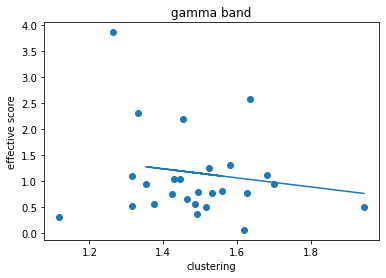

In [4]:
#Gamma Band
x = gamma_sw.reshape(-1,1)
y = Score_effective.reshape(-1,1)

x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
mse = sqrt(mean_squared_error(y_test, y_pred))
print('mse: ', mse)
print('accuracy: ',model.score(x_test, y_test))


corco = np.corrcoef(gamma_sw,Score_effective)
print('Correlation',corco)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
print('K-fold_score: ',sqrt(mean(absolute(scores))))

plt.scatter(x,y)
plt.plot(x_test,y_pred)
plt.xlabel('clustering')
plt.ylabel('effective score')
plt.title('gamma band')
plt.show()

mse:  0.5260290507600339
accuracy:  -3.838404504817831
Correlation [[1.         0.47898674]
 [0.47898674 1.        ]]
K-fold_score:  0.7732458989921107


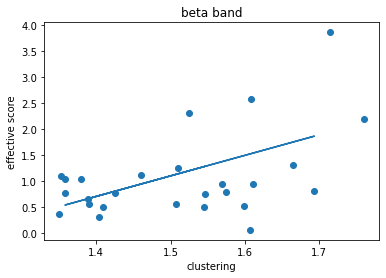

In [5]:
#Beta Band
x = beta_sw.reshape(-1,1)
y = Score_effective.reshape(-1,1)

x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
mse = sqrt(mean_squared_error(y_test, y_pred))
print('mse: ', mse)
print('accuracy: ',model.score(x_test, y_test))


corco = np.corrcoef(beta_sw,Score_effective)
print('Correlation',corco)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
print('K-fold_score: ',sqrt(mean(absolute(scores))))

plt.scatter(x,y)
plt.plot(x_test,y_pred)
plt.xlabel('clustering')
plt.ylabel('effective score')
plt.title('beta band')
plt.show()

mse:  0.7582783622423456
accuracy:  -9.054026876751083
Correlation [[1.         0.61765683]
 [0.61765683 1.        ]]
K-fold_score:  0.7411960545006295


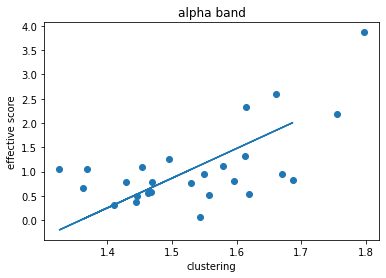

In [6]:
#Alpha Band
x = alpha_sw.reshape(-1,1)
y = Score_effective.reshape(-1,1)

x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
mse = sqrt(mean_squared_error(y_test, y_pred))
print('mse: ', mse)
print('accuracy: ',model.score(x_test, y_test))


corco = np.corrcoef(alpha_sw,Score_effective)
print('Correlation',corco)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
print('K-fold_score: ',sqrt(mean(absolute(scores))))

plt.scatter(x,y)
plt.plot(x_test,y_pred)
plt.xlabel('clustering')
plt.ylabel('effective score')
plt.title('alpha band')
plt.show()